IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

MA Peiran 28717249

ZHOU Runlin 28717281

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [9]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math
import random

# Importation de la librairie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

import time

In [2]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [3]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [4]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

## Partie 1 -- data 2D

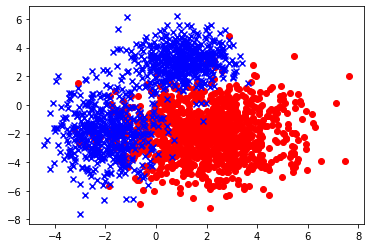

In [6]:
# Affichage
ut.plot2DSet(X2D,Y2D)

### knn classifieur

In [7]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer k optimal
accuracies = []
seuil_k = len(X2D) // 20
valeurs_k = [k for k in range(1,seuil_k,3)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,0)
for i in valeurs_k:
    classifier_knn_temp = classif.ClassifierKNN(2,i)
    classifier_knn_temp.train(X_learn_temp, Y_learn_temp)
    accuracies.append(classifier_knn_temp.accuracy(X_test_temp, Y_test_temp))


k optimal : 40


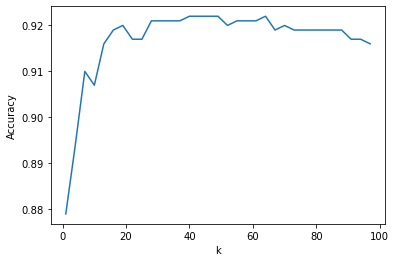

In [8]:
k_opt = accuracies.index(max(accuracies))*3+1
print("k optimal : "+str(k_opt))
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

Time used :  0.011681318283081055
Accuracy :  0.9235


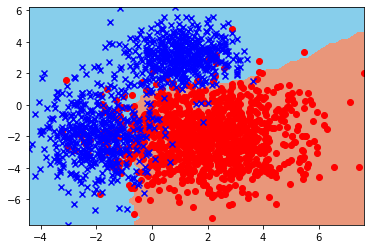

In [9]:
knn_2D = classif.ClassifierKNN(2, k_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,10,i)
    knn_2D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", knn_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,knn_2D,step=60)
ut.plot2DSet(X2D,Y2D)

### perceptron classifieur

In [10]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,0)
for i in valeurs_lr:
    classifier_perceptron_temp = classif.ClassifierPerceptron(2, i, True)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_temp = classif.ClassifierPerceptron(2, i, False)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))


init optimal : True
learning rate optimal : 0.04


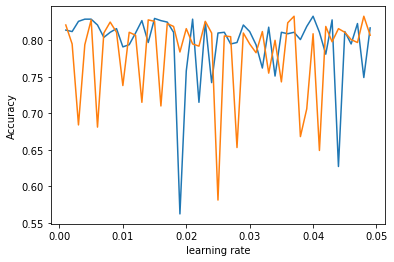

In [11]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

Time used :  3.1624417304992676
Accuracy :  0.7475


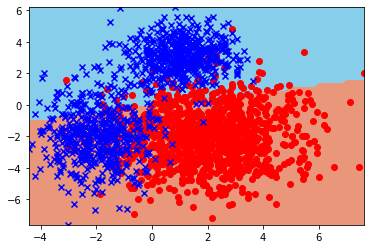

In [12]:
perceptron_2D = classif.ClassifierPerceptron(2, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,10,i)
    perceptron_2D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,perceptron_2D,step=60)
ut.plot2DSet(X2D,Y2D)

### perceptron biais classifieur

In [13]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,0)
for i in valeurs_lr:
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(2, i, True)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(2, i, False)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))


init optimal : True
learning rate optimal : 0.04


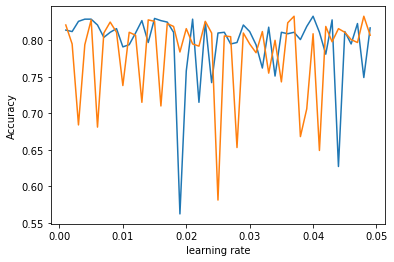

In [14]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

Time used :  3.3938851356506348
Accuracy :  0.7475


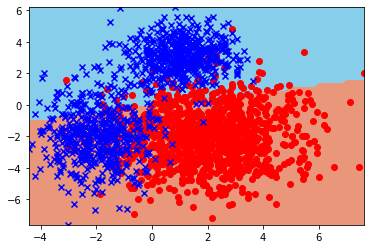

In [15]:
perceptron_biais_2D = classif.ClassifierPerceptron(2, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,10,i)
    perceptron_biais_2D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_biais_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,perceptron_biais_2D,step=60)
ut.plot2DSet(X2D,Y2D)

## Partie 2 -- data 5D

La dimension de ce dataset est 5, nous représentons sa classification par C52 = 10 images 2D.L'image sera une vue en coupe bidimensionnelle de l'espace à cinq dimensions lorsque les valeurs des trois dimensions non choisis sont leurs valeurs moyennes.

Ces images ont peu d'importance, car les points de l'image sont les projections de points à cinq dimensions en deux dimensions, mais la division de la zone est basée sur les valeurs spécifiques des trois dimensions restantes. Cela ne représente pas très bien le cas de la classification.

Pour résoudre ce problème, nous pouvons réécrire la fonction plot2DSet. Pour chaque point [dim1, dim2] dans l'espace linéaire à deux dimensions, nous comptons toutes les valeurs possibles de [dim_rest_1, dim_rest_2, dim_rest_3], et marquons le point avec une étiquette plus probable.

Cependant, cela augmentera considérablement la complexité de la fonction, atteignant O(n^5), ce qui entraînera l'exécution du programme pendant une durée extrêmement longue. Nous n'avons donc pas fait cela.

In [3]:
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2', 'x3', 'x4', 'x5']], dtype=float)
Y5D = np.array(data5D['label'], dtype=float)

In [7]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [8]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [9]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

### knn classifieur

In [13]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer k optimal
accuracies = []
seuil_k = len(X5D) // 20
valeurs_k = [k for k in range(1,seuil_k,3)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,2,0)
for i in valeurs_k:
    classifier_knn_temp = classif.ClassifierKNN(5,i)
    classifier_knn_temp.train(X_learn_temp, Y_learn_temp)
    accuracies.append(classifier_knn_temp.accuracy(X_test_temp, Y_test_temp))


k optimal : 43


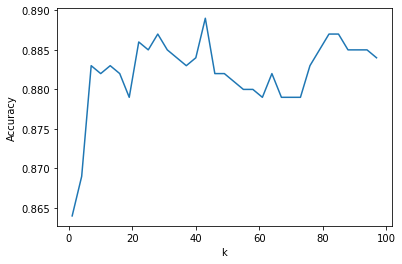

In [14]:
k_opt = accuracies.index(max(accuracies))*3+1
print("k optimal : "+str(k_opt))
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

In [15]:
knn_5D = classif.ClassifierKNN(5, k_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,10,i)
    knn_5D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", knn_5D.accuracy(X5D,Y5D))


Time used :  0.013625860214233398
Accuracy :  0.8875


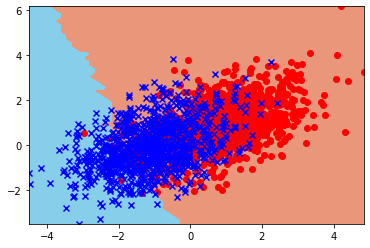

In [26]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 1, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,1]]).T,Y5D)

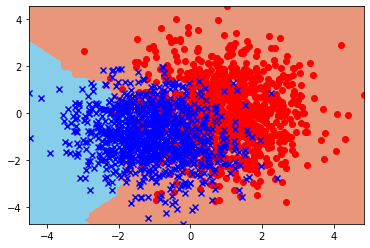

In [27]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 2, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,2]]).T,Y5D)

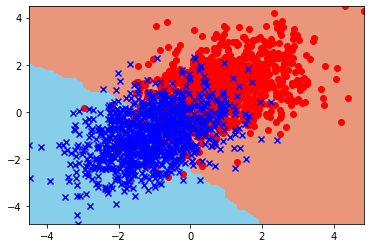

In [28]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 3, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,3]]).T,Y5D)

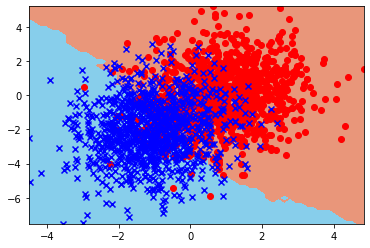

In [29]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 4, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,4]]).T,Y5D)

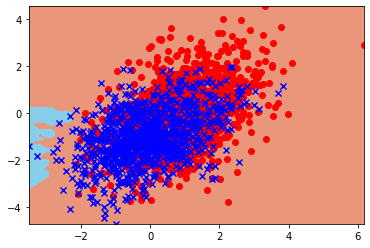

In [30]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 1, 2, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,2]]).T,Y5D)

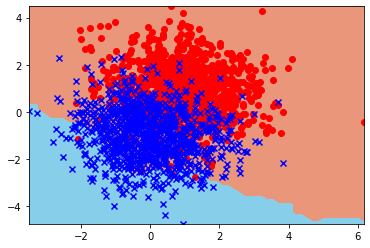

In [31]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 1, 3, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,3]]).T,Y5D)

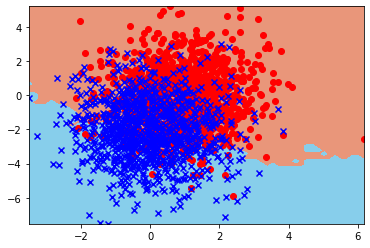

In [32]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 1, 4, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,4]]).T,Y5D)

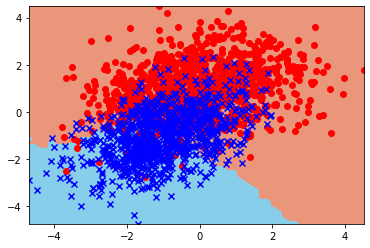

In [33]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 2, 3, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,3]]).T,Y5D)

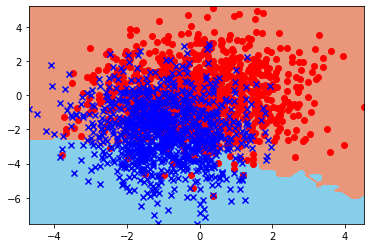

In [34]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 2, 4, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,4]]).T,Y5D)

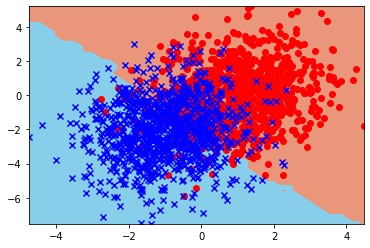

In [35]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 3, 4, step=60)
ut.plot2DSet(np.array([X5D[:,3],X5D[:,4]]).T,Y5D)

### perceptron classifieur

In [36]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,2,0)
for i in valeurs_lr:
    classifier_perceptron_temp = classif.ClassifierPerceptron(5, i, True)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_temp = classif.ClassifierPerceptron(5, i, False)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))

init optimal : False
learning rate optimal : 0.033


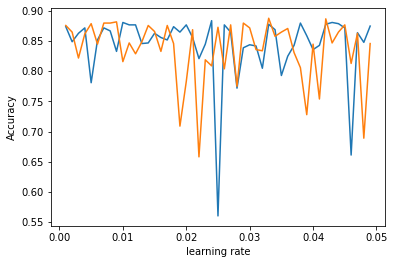

In [37]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

In [38]:
perceptron_5D = classif.ClassifierPerceptron(5, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,10,i)
    perceptron_5D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_5D.accuracy(X5D,Y5D))

Time used :  2.7821810245513916
Accuracy :  0.8825


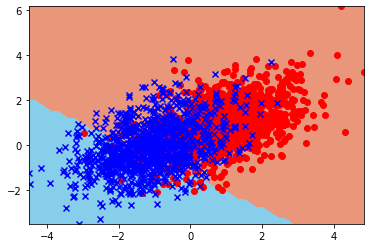

In [39]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 1, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,1]]).T,Y5D)

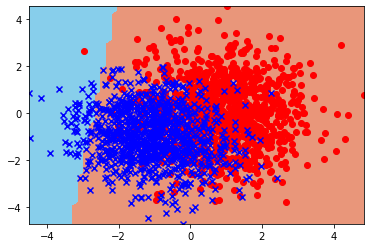

In [40]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 2, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,2]]).T,Y5D)

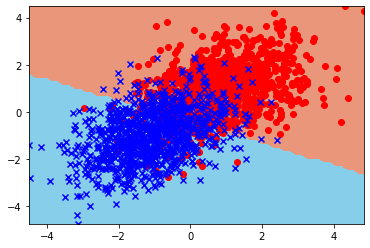

In [41]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 3, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,3]]).T,Y5D)

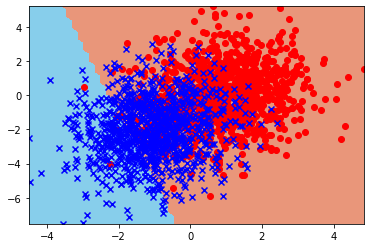

In [42]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 4, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,4]]).T,Y5D)

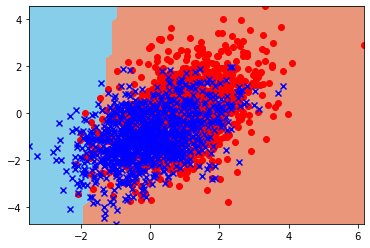

In [43]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 1, 2, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,2]]).T,Y5D)

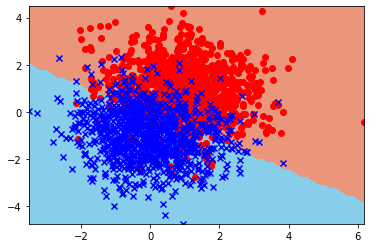

In [44]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 1, 3, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,3]]).T,Y5D)

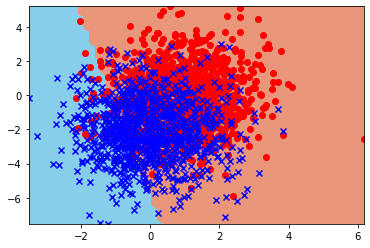

In [45]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 1, 4, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,4]]).T,Y5D)

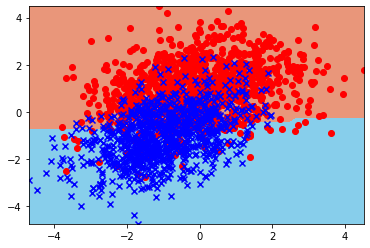

In [46]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 2, 3, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,3]]).T,Y5D)

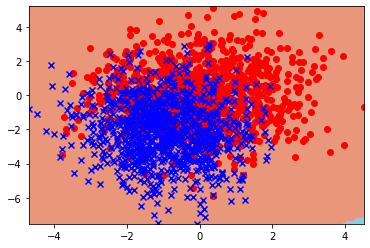

In [47]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 2, 4, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,4]]).T,Y5D)

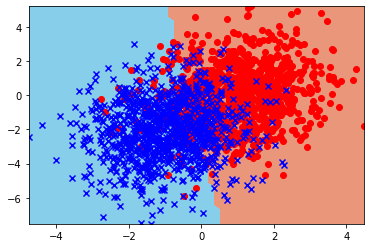

In [48]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 3, 4, step=60)
ut.plot2DSet(np.array([X5D[:,3],X5D[:,4]]).T,Y5D)

### perceptron biais classifieur

In [49]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,2,0)
for i in valeurs_lr:
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(5, i, True)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(5, i, False)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))

init optimal : False
learning rate optimal : 0.033


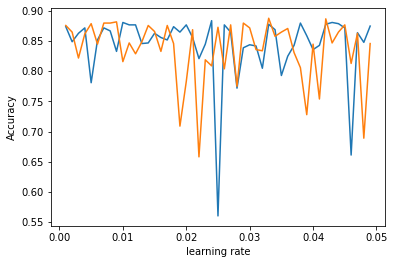

In [50]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

In [51]:
perceptron_biais_5D = classif.ClassifierPerceptron(5, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,10,i)
    perceptron_biais_5D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_biais_5D.accuracy(X5D,Y5D))

Time used :  2.8047962188720703
Accuracy :  0.8825


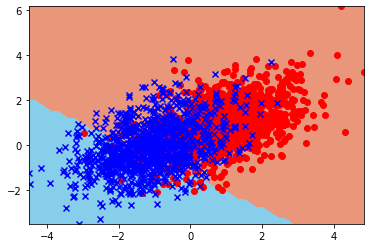

In [52]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 1, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,1]]).T,Y5D)

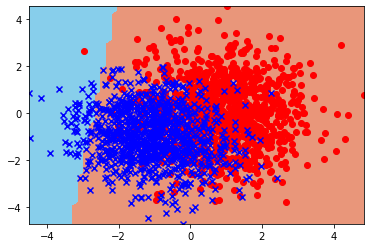

In [53]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 2, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,2]]).T,Y5D)

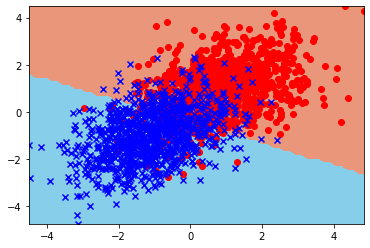

In [54]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 3, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,3]]).T,Y5D)

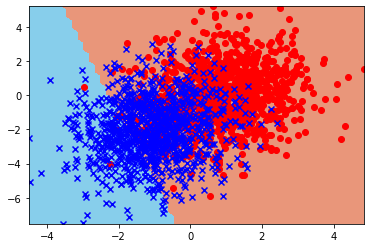

In [55]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 4, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,4]]).T,Y5D)

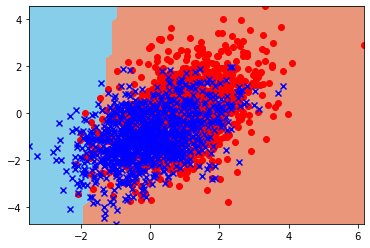

In [56]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 1, 2, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,2]]).T,Y5D)

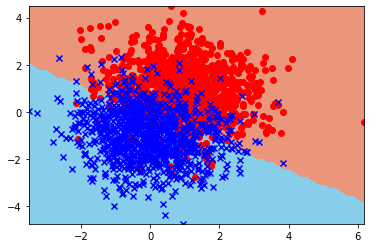

In [57]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 1, 3, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,3]]).T,Y5D)

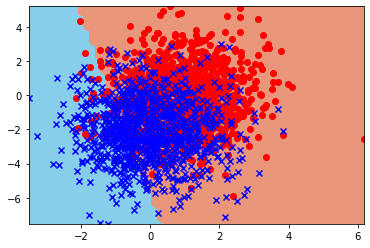

In [58]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 1, 4, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,4]]).T,Y5D)

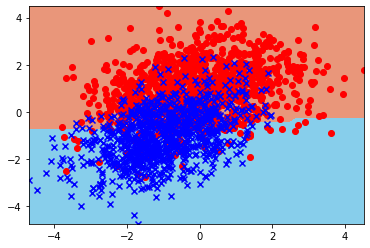

In [59]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 2, 3, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,3]]).T,Y5D)

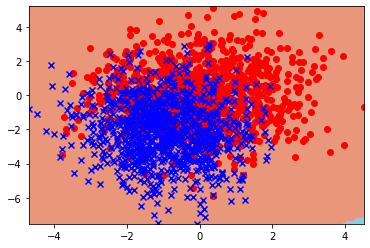

In [60]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 2, 4, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,4]]).T,Y5D)

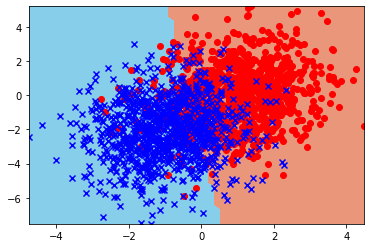

In [61]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 3, 4, step=60)
ut.plot2DSet(np.array([X5D[:,3],X5D[:,4]]).T,Y5D)